In [1]:
import pandas as pd

ecommerce_new = pd.read_csv("C:/Users/91901/OneDrive/Documents/DownLoads/ecommerce_dynamic_pricing_dataset.csv")

In [2]:
ecommerce_new.head()

,Transaction_ID,Product_ID,Product_Category,Price,Discount,Customer_ID,Customer_Age,Customer_Gender,Purchase_Timestamp,Payment_Method,Shipping_Type,Review_Rating,Purchase Probability
0,T180787,P8392,Books,15.58,0.46,C66501,49,Male,3/31/2024 14:16,Credit Card,Express,1,0
1,T750990,P5778,Books,62.00,12.27,C12853,26,Other,2/10/2024 9:31,Debit Card,Express,2,1
2,T627626,P5136,Home & Kitchen,958.29,61.67,C74523,23,Male,5/23/2024 13:04,Debit Card,Express,4,0
3,T602068,P5945,Electronics,657.01,135.43,C31822,33,Female,6/22/2024 9:20,PayPal,Standard,1,0
4,T286338,P8427,Home & Kitchen,147.16,22.23,C84859,40,Other,5/16/2024 6:15,Credit Card,Express,2,1


In [3]:
ecommerce_new.isnull().sum()

Transaction_ID          0
Product_ID              0
Product_Category        0
Price                   0
Discount                0
Customer_ID             0
Customer_Age            0
Customer_Gender         0
Purchase_Timestamp      0
Payment_Method          0
Shipping_Type           0
Review_Rating           0
Purchase Probability    0
dtype: int64

In [4]:
print(ecommerce_new['Product_ID'].duplicated().sum())

887


In [5]:
print("Duplicates before:", ecommerce_new.duplicated(subset=['Product_ID','Customer_ID']).sum())

Duplicates before: 799


In [6]:
exact_dupes = ecommerce_new[ecommerce_new.duplicated(keep=False)]

print("Exact duplicates count:", exact_dupes.shape[0])
print(exact_dupes.head(10))  # show first 10 duplicate rows


Exact duplicates count: 1363
   Transaction_ID Product_ID Product_Category   Price  Discount Customer_ID  \
0         T180787      P8392            Books   15.58      0.46      C66501   
1         T750990      P5778            Books   62.00     12.27      C12853   
3         T602068      P5945      Electronics  657.01    135.43      C31822   
5         T160024      P4759   Home & Kitchen   52.91     11.47      C48411   
7         T799627      P8173      Electronics  158.92     34.94      C67063   
9         T927201      P4211         Clothing  185.36     53.99      C27928   
10        T417121      P6673   Home & Kitchen  979.25    283.78      C19825   
11        T993352      P7502         Clothing  900.41    197.97      C18810   
12        T663015      P9994      Electronics  432.83     38.96      C67904   
13        T695082      P4794      Electronics   35.91      6.25      C27646   

    Customer_Age Customer_Gender Purchase_Timestamp Payment_Method  \
0             49            Mal

In [7]:
import pandas as pd

# Step 1: drop Transaction_ID if it's unique per row (otherwise duplicates won't match)
# (if Transaction_ID repeats for exact rows in your dataset, you can keep it)
keys = ecommerce_new.drop(columns=["Transaction_ID"]).apply(tuple, axis=1)

# Step 2: count frequency of each unique row
demand_map = keys.value_counts().to_dict()

# Step 3: assign demand count back to all rows
ecommerce_new["Demand"] = keys.map(demand_map)

# Step 4: check some duplicate rows
print(ecommerce_new.loc[[128, 296]])
print(ecommerce_new.loc[[659, 771, 831, 1005, 1192, 1550]])


    Transaction_ID Product_ID Product_Category   Price  Discount Customer_ID  \
128        T512631      P1010         Clothing  387.03    107.53      C91065   
296        T512631      P1010         Clothing  387.03    107.53      C91065   

     Customer_Age Customer_Gender Purchase_Timestamp Payment_Method  \
128            35           Other     5/1/2024 22:03    Credit Card   
296            35           Other     5/1/2024 22:03    Credit Card   

    Shipping_Type  Review_Rating  Purchase Probability  Demand  
128      Standard              5                     1       2  
296      Standard              5                     1       2  
     Transaction_ID Product_ID Product_Category   Price  Discount Customer_ID  \
659         T592415      P1013   Home & Kitchen  481.24      0.09      C42483   
771         T592415      P1013   Home & Kitchen  481.24      0.09      C42483   
831         T592415      P1013   Home & Kitchen  481.24      0.09      C42483   
1005        T592415      P

In [8]:
ecommerce_new['Purchase_Timestamp'] = pd.to_datetime(
    ecommerce_new['Purchase_Timestamp'], errors='coerce'
)


In [9]:
ecommerce_new['Date'] = ecommerce_new['Purchase_Timestamp'].dt.date
ecommerce_new['Month'] = ecommerce_new['Purchase_Timestamp'].dt.month
ecommerce_new['DayOfWeek'] = ecommerce_new['Purchase_Timestamp'].dt.dayofweek

In [10]:
unique_rows = ecommerce_new.drop_duplicates()
daily_demand = (
    unique_rows.groupby(['Date', 'Product_Category'])['Demand']
    .sum()
    .reset_index()
)
print(daily_demand.head())


         Date Product_Category  Demand
0  2024-01-01            Books       2
1  2024-01-01         Clothing       5
2  2024-01-01   Home & Kitchen       2
3  2024-01-02      Electronics       1
4  2024-01-02   Home & Kitchen       2


In [11]:
import pandas as pd

# Make sure Date column is in datetime format
daily_demand["Date"] = pd.to_datetime(daily_demand["Date"])

# Define the date properly as datetime
date_to_check = pd.to_datetime("2024-04-30")

# Filter again
daily_demand_on_date = daily_demand[daily_demand["Date"] == date_to_check]

print(daily_demand_on_date)


          Date Product_Category  Demand
280 2024-04-30            Books       3
281 2024-04-30         Clothing       2
282 2024-04-30   Home & Kitchen       8


In [12]:
import numpy as np

np.random.seed(42)  

# ---------------------------
# Step 1: Generate competitor prices (as float first, not int)
ecommerce_new["competitor1_price"] = ecommerce_new["Price"].astype(float) * np.random.uniform(0.9, 1.1, len(ecommerce_new))
ecommerce_new["competitor2_price"] = ecommerce_new["Price"].astype(float) * np.random.uniform(0.85, 1.15, len(ecommerce_new))

# ---------------------------
# Step 2: Apply seasonal adjustments

# January (Sankranthi) - Clothing + Home & Kitchen ↑ 5%
ecommerce_new.loc[
    (ecommerce_new["Month"] == 1) & 
    (ecommerce_new["Product_Category"].isin(["Clothing", "Home & Kitchen"])),
    ["competitor1_price", "competitor2_price"]
] *= 1.05

# February (Valentine) - Clothing + Books ↓ 10%
ecommerce_new.loc[
    (ecommerce_new["Month"] == 2) & 
    (ecommerce_new["Product_Category"].isin(["Clothing", "Books"])),
    ["competitor1_price", "competitor2_price"]
] *= 0.90

# November & December (Diwali/Christmas) - Electronics + Clothing + Home & Kitchen ↓ 15%
ecommerce_new.loc[
    (ecommerce_new["Month"].isin([11, 12])) & 
    (ecommerce_new["Product_Category"].isin(["Electronics", "Clothing", "Home & Kitchen"])),
    ["competitor1_price", "competitor2_price"]
] *= 0.85

# Optional: Explicitly handle March–October (no adjustment, just to show it's considered)
ecommerce_new.loc[
    (ecommerce_new["Month"].isin([3,4,5,6,7,8,9,10])),
    ["competitor1_price", "competitor2_price"]
] *= 1.00  # no change

# ---------------------------
# Step 3: Round & cast to int only once at the end
ecommerce_new["competitor1_price"] = ecommerce_new["competitor1_price"].round(0).astype(int)
ecommerce_new["competitor2_price"] = ecommerce_new["competitor2_price"].round(0).astype(int)

# ✅ Now no warnings + seasonal competitor prices done!


In [13]:
ecommerce_new.head()

,Transaction_ID,Product_ID,Product_Category,Price,Discount,Customer_ID,Customer_Age,Customer_Gender,Purchase_Timestamp,Payment_Method,Shipping_Type,Review_Rating,Purchase Probability,Demand,Date,Month,DayOfWeek,competitor1_price,competitor2_price
0,T180787,P8392,Books,15.58,0.46,C66501,49,Male,2024-03-31 14:16:00,Credit Card,Express,1,0,3,2024-03-31,3,6,15,17
1,T750990,P5778,Books,62.00,12.27,C12853,26,Other,2024-02-10 09:31:00,Debit Card,Express,2,1,2,2024-02-10,2,5,61,60
2,T627626,P5136,Home & Kitchen,958.29,61.67,C74523,23,Male,2024-05-23 13:04:00,Debit Card,Express,4,0,1,2024-05-23,5,3,1003,834
3,T602068,P5945,Electronics,657.01,135.43,C31822,33,Female,2024-06-22 09:20:00,PayPal,Standard,1,0,4,2024-06-22,6,5,670,698
4,T286338,P8427,Home & Kitchen,147.16,22.23,C84859,40,Other,2024-05-16 06:15:00,Credit Card,Express,2,1,1,2024-05-16,5,3,137,149


In [14]:
ecommerce_new["Date"] = pd.to_datetime(ecommerce_new["Date"], format="%Y-%m-%d", errors="coerce")
print(ecommerce_new.dtypes)
len(ecommerce_new)

Transaction_ID                  object
Product_ID                      object
Product_Category                object
Price                          float64
Discount                       float64
Customer_ID                     object
Customer_Age                     int64
Customer_Gender                 object
Purchase_Timestamp      datetime64[ns]
Payment_Method                  object
Shipping_Type                   object
Review_Rating                    int64
Purchase Probability             int64
Demand                           int64
Date                    datetime64[ns]
Month                            int32
DayOfWeek                        int32
competitor1_price                int32
competitor2_price                int32
dtype: object


2044

In [15]:
print(ecommerce_new["Product_Category"].unique())

['Books' 'Home & Kitchen' 'Electronics' 'Clothing']


In [16]:
print(daily_demand.dtypes)
print(daily_demand.head())

Date                datetime64[ns]
Product_Category            object
Demand                       int64
dtype: object
        Date Product_Category  Demand
0 2024-01-01            Books       2
1 2024-01-01         Clothing       5
2 2024-01-01   Home & Kitchen       2
3 2024-01-02      Electronics       1
4 2024-01-02   Home & Kitchen       2


In [17]:
# convert Date column to datetime
daily_demand["Date"] = pd.to_datetime(daily_demand["Date"], format="%Y-%m-%d", errors="coerce")
print(daily_demand.dtypes)


Date                datetime64[ns]
Product_Category            object
Demand                       int64
dtype: object


In [18]:
print(daily_demand.head(10))

        Date Product_Category  Demand
0 2024-01-01            Books       2
1 2024-01-01         Clothing       5
2 2024-01-01   Home & Kitchen       2
3 2024-01-02      Electronics       1
4 2024-01-02   Home & Kitchen       2
5 2024-01-03            Books       3
6 2024-01-03      Electronics       2
7 2024-01-04            Books       4
8 2024-01-04         Clothing       7
9 2024-01-04      Electronics       3


In [19]:
##PROPHET FOR TIME SERIES DEMAND FORECASTING

In [20]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [21]:
from prophet import Prophet
import pandas as pd

# Ensure datetime
daily_demand["Date"] = pd.to_datetime(daily_demand["Date"])

all_forecasts = []
ecommerce_new["Effective_Price"] = ecommerce_new["Price"] - ecommerce_new["Discount"]

# Regressors = only competitor prices for now
reg_cols = ["Effective_Price","competitor1_price", "competitor2_price"]

for cat in daily_demand["Product_Category"].unique():
    # Filter one category
    df_cat = daily_demand[daily_demand["Product_Category"] == cat].copy()
    df_cat = df_cat.rename(columns={"Date": "ds", "Demand": "y"})
    
    # Ensure regressors exist
    for col in reg_cols:
        if col not in df_cat.columns:
            df_cat[col] = 0
    
    # Initialize Prophet with regressors
    model = Prophet(yearly_seasonality=True, daily_seasonality=False)
    for col in reg_cols:
        model.add_regressor(col)
    
    # Fit model
    model.fit(df_cat[["ds", "y"] + reg_cols])
    
    # Make future df (next 30 days)
    future = model.make_future_dataframe(periods=30)
    
    # Add regressors for the future (keep last known value)
    for col in reg_cols:
        future[col] = df_cat[col].iloc[-1]
    
    # Forecast
    forecast = model.predict(future)
    forecast = forecast[["ds", "yhat"]].rename(columns={"ds": "Date", "yhat": "forecast_demand"})
    forecast["Product_Category"] = cat
    
    all_forecasts.append(forecast)

# Combine all forecasts
forecast_all = pd.concat(all_forecasts)

# Merge with original
daily_demand_forecast = pd.merge(
    daily_demand, forecast_all,
    on=["Date", "Product_Category"], how="left"
)

print(daily_demand_forecast.head())


02:26:26 - cmdstanpy - INFO - Chain [1] start processing
02:26:26 - cmdstanpy - INFO - Chain [1] done processing
02:26:27 - cmdstanpy - INFO - Chain [1] start processing
02:26:27 - cmdstanpy - INFO - Chain [1] done processing
02:26:27 - cmdstanpy - INFO - Chain [1] start processing
02:26:27 - cmdstanpy - INFO - Chain [1] done processing
02:26:28 - cmdstanpy - INFO - Chain [1] start processing
02:26:28 - cmdstanpy - INFO - Chain [1] done processing


        Date Product_Category  Demand  forecast_demand
0 2024-01-01            Books       2         2.620279
1 2024-01-01         Clothing       5         2.980404
2 2024-01-01   Home & Kitchen       2         1.606305
3 2024-01-02      Electronics       1         1.209357
4 2024-01-02   Home & Kitchen       2         2.186345


In [22]:
import numpy as np

# Create new column with rounded integer forecast
daily_demand_forecast["forecast_demand_int"] = daily_demand_forecast["forecast_demand"].apply(
    lambda x: np.floor(x) if x <= 0.5 else np.ceil(x)
)

print(daily_demand_forecast.head())

        Date Product_Category  Demand  forecast_demand  forecast_demand_int
0 2024-01-01            Books       2         2.620279                  3.0
1 2024-01-01         Clothing       5         2.980404                  3.0
2 2024-01-01   Home & Kitchen       2         1.606305                  2.0
3 2024-01-02      Electronics       1         1.209357                  2.0
4 2024-01-02   Home & Kitchen       2         2.186345                  3.0


In [23]:
future_only = daily_demand_forecast[daily_demand_forecast["Demand"].isna()]
print(future_only.head(10))


Empty DataFrame
Columns: [Date, Product_Category, Demand, forecast_demand, forecast_demand_int]
Index: []


In [24]:
# Keep history (with actual demand)
history = daily_demand.rename(columns={"Date": "ds", "Demand": "y"})
history["type"] = "history"

# Keep forecast (all Prophet output)
forecast_all = pd.concat(all_forecasts)
forecast_all = forecast_all.rename(columns={"Date": "ds", "forecast_demand": "yhat"})
forecast_all["type"] = "forecast"

# Combine
combined = pd.concat([history, forecast_all], ignore_index=True)

print(combined.tail(20))   # will show last few rows (future included!)


             ds Product_Category   y      type      yhat
1784 2025-01-11      Electronics NaN  forecast  4.562110
1785 2025-01-12      Electronics NaN  forecast  4.529077
1786 2025-01-13      Electronics NaN  forecast  4.883056
1787 2025-01-14      Electronics NaN  forecast  4.664123
1788 2025-01-15      Electronics NaN  forecast  4.709690
1789 2025-01-16      Electronics NaN  forecast  4.533033
1790 2025-01-17      Electronics NaN  forecast  4.263291
1791 2025-01-18      Electronics NaN  forecast  4.700136
1792 2025-01-19      Electronics NaN  forecast  4.544902
1793 2025-01-20      Electronics NaN  forecast  4.781216
1794 2025-01-21      Electronics NaN  forecast  4.451533
1795 2025-01-22      Electronics NaN  forecast  4.395491
1796 2025-01-23      Electronics NaN  forecast  4.128396
1797 2025-01-24      Electronics NaN  forecast  3.781167
1798 2025-01-25      Electronics NaN  forecast  4.154974
1799 2025-01-26      Electronics NaN  forecast  3.952325
1800 2025-01-27      Electronic

In [25]:
# Keep the first occurrence of 'forecast_demand' and drop the rest
ecommerce_new = ecommerce_new.loc[:, ~ecommerce_new.columns.duplicated()]

# Check
print(ecommerce_new.columns)


Index(['Transaction_ID', 'Product_ID', 'Product_Category', 'Price', 'Discount',
       'Customer_ID', 'Customer_Age', 'Customer_Gender', 'Purchase_Timestamp',
       'Payment_Method', 'Shipping_Type', 'Review_Rating',
       'Purchase Probability', 'Demand', 'Date', 'Month', 'DayOfWeek',
       'competitor1_price', 'competitor2_price', 'Effective_Price'],
      dtype='object')


In [26]:
ecommerce_new['Date'] = pd.to_datetime(ecommerce_new['Date'])

# Merge forecast demand into ecommerce_new
ecommerce_new = ecommerce_new.merge(
    daily_demand_forecast[['Date', 'Product_Category', 'forecast_demand']],
    on=['Date', 'Product_Category'],
    how='left'
)


In [27]:
ecommerce_new.head()

,Transaction_ID,Product_ID,Product_Category,Price,Discount,Customer_ID,Customer_Age,Customer_Gender,Purchase_Timestamp,Payment_Method,...,Review_Rating,Purchase Probability,Demand,Date,Month,DayOfWeek,competitor1_price,competitor2_price,Effective_Price,forecast_demand
0,T180787,P8392,Books,15.58,0.46,C66501,49,Male,2024-03-31 14:16:00,Credit Card,...,1,0,3,2024-03-31,3,6,15,17,15.12,2.843554
1,T750990,P5778,Books,62.00,12.27,C12853,26,Other,2024-02-10 09:31:00,Debit Card,...,2,1,2,2024-02-10,2,5,61,60,49.73,2.141773
2,T627626,P5136,Home & Kitchen,958.29,61.67,C74523,23,Male,2024-05-23 13:04:00,Debit Card,...,4,0,1,2024-05-23,5,3,1003,834,896.62,2.362121
3,T602068,P5945,Electronics,657.01,135.43,C31822,33,Female,2024-06-22 09:20:00,PayPal,...,1,0,4,2024-06-22,6,5,670,698,521.58,2.665641
4,T286338,P8427,Home & Kitchen,147.16,22.23,C84859,40,Other,2024-05-16 06:15:00,Credit Card,...,2,1,1,2024-05-16,5,3,137,149,124.93,2.896701


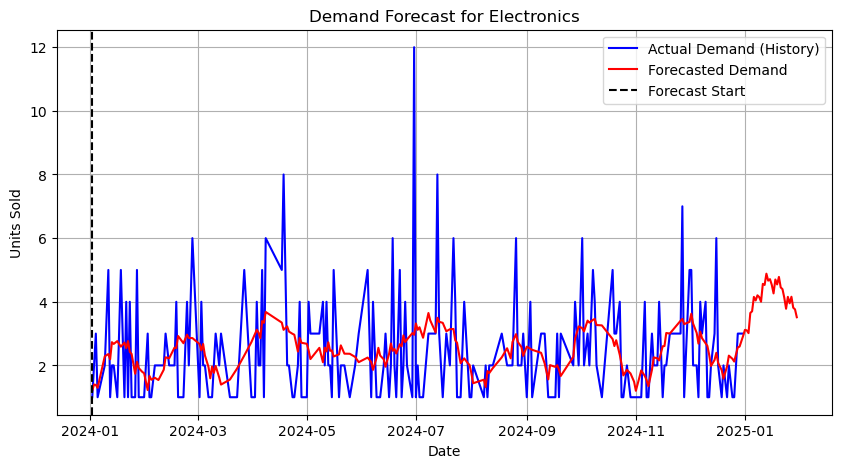

In [28]:
import matplotlib.pyplot as plt

def plot_forecast(combined, category):
    # Filter only one category
    df_cat = combined[combined["Product_Category"] == category]

    # Separate history and forecast
    history = df_cat[df_cat["type"] == "history"]
    forecast = df_cat[df_cat["type"] == "forecast"]

    # Plot
    plt.figure(figsize=(10,5))
    
    # In history → demand is stored in "y"
    if "y" in history.columns:
        plt.plot(history["ds"], history["y"], label="Actual Demand (History)", color="blue")
    elif "demand" in history.columns:
        plt.plot(history["ds"], history["demand"], label="Actual Demand (History)", color="blue")
    
    # Forecast always in "yhat"
    plt.plot(forecast["ds"], forecast["yhat"], label="Forecasted Demand", color="red")

    # Vertical line where forecast starts
    forecast_start = forecast["ds"].min()
    plt.axvline(forecast_start, color="black", linestyle="--", label="Forecast Start")

    # Labels & title
    plt.title(f"Demand Forecast for {category}")
    plt.xlabel("Date")
    plt.ylabel("Units Sold")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_forecast(combined, "Electronics")


In [29]:
# Length of ecommerce_new
print("Number of rows in ecommerce_new:", len(ecommerce_new))

# Length of daily_demand (historical demand per category per day)
print("Number of rows in daily_demand:", len(daily_demand))

# Length of daily_demand_forecast (Prophet forecast for next 30 days)
print("Number of rows in daily_demand_forecast:", len(daily_demand_forecast))


Number of rows in ecommerce_new: 2044
Number of rows in daily_demand: 842
Number of rows in daily_demand_forecast: 842


In [30]:
ecommerce_new.head()

,Transaction_ID,Product_ID,Product_Category,Price,Discount,Customer_ID,Customer_Age,Customer_Gender,Purchase_Timestamp,Payment_Method,...,Review_Rating,Purchase Probability,Demand,Date,Month,DayOfWeek,competitor1_price,competitor2_price,Effective_Price,forecast_demand
0,T180787,P8392,Books,15.58,0.46,C66501,49,Male,2024-03-31 14:16:00,Credit Card,...,1,0,3,2024-03-31,3,6,15,17,15.12,2.843554
1,T750990,P5778,Books,62.00,12.27,C12853,26,Other,2024-02-10 09:31:00,Debit Card,...,2,1,2,2024-02-10,2,5,61,60,49.73,2.141773
2,T627626,P5136,Home & Kitchen,958.29,61.67,C74523,23,Male,2024-05-23 13:04:00,Debit Card,...,4,0,1,2024-05-23,5,3,1003,834,896.62,2.362121
3,T602068,P5945,Electronics,657.01,135.43,C31822,33,Female,2024-06-22 09:20:00,PayPal,...,1,0,4,2024-06-22,6,5,670,698,521.58,2.665641
4,T286338,P8427,Home & Kitchen,147.16,22.23,C84859,40,Other,2024-05-16 06:15:00,Credit Card,...,2,1,1,2024-05-16,5,3,137,149,124.93,2.896701


In [31]:
# Example: filter Books on a single date
Date = "2024-01-12"

books_day = ecommerce_new[
    (ecommerce_new["Product_Category"] == "Books") &
    (ecommerce_new["Purchase_Timestamp"].dt.date.astype(str) == Date)
]

# show all rows (all Transaction_IDs for Books on this date)
print(books_day[["Transaction_ID","Product_Category","Purchase_Timestamp",
                 "Effective_Price","competitor1_price","competitor2_price",
                 "forecast_demand"]])

# Count how many Book transactions happened on that date
count_books = ecommerce_new[
    (ecommerce_new["Product_Category"] == "Books") &
    (ecommerce_new["Date"] == Date)
].shape[0]

print(f"Total Book transactions on {Date}: {count_books}")


     Transaction_ID Product_Category  Purchase_Timestamp  Effective_Price  \
552         T289479            Books 2024-01-12 20:41:00           225.55   
1975        T694847            Books 2024-01-12 09:55:00           562.41   

      competitor1_price  competitor2_price  forecast_demand  
552                 325                300         1.652721  
1975                650                549         1.652721  
Total Book transactions on 2024-01-12: 2


In [32]:
## RL MODEL

In [33]:
!pip install numpy pandas matplotlib torch


In [34]:
# Data handling
import numpy as np
import pandas as pd

# PyTorch for DQN
import torch
import torch.nn as nn
import torch.optim as optim

# For random actions and replay memory
import random
from collections import deque

# Optional: for plotting results
import matplotlib.pyplot as plt


In [35]:
print(ecommerce_new.columns.tolist())


['Transaction_ID', 'Product_ID', 'Product_Category', 'Price', 'Discount', 'Customer_ID', 'Customer_Age', 'Customer_Gender', 'Purchase_Timestamp', 'Payment_Method', 'Shipping_Type', 'Review_Rating', 'Purchase Probability', 'Demand', 'Date', 'Month', 'DayOfWeek', 'competitor1_price', 'competitor2_price', 'Effective_Price', 'forecast_demand']


In [41]:
import numpy as np
import pandas as pd

class PricingEnvElastic:
    def __init__(self, ecommerce_df, elasticities, use_actual=False, price_col="Price",
                 demand_col="demand", forecast_col="forecast_demand", action_space=None):
        """
        ecommerce_df : dataframe with at least columns:
          ['Date','Product_Category', price_col, demand_col, forecast_col, 'competitor1_price','competitor2_price']
        elasticities : dict {category: beta} where beta is elasticity from ln-ln regression
        use_actual : if True use historical demand_col as base demand; if False use forecast_col
        action_space : list of price multipliers (e.g. [-0.10, -0.05, 0, 0.05, 0.10])
        """
        self.df = ecommerce_df.copy().reset_index(drop=True)
        self.elasticities = elasticities
        self.use_actual = use_actual
        self.price_col = price_col
        self.demand_col = demand_col
        self.forecast_col = forecast_col
        self.n_steps = len(self.df)
        self.current_step = 0
        self.state_size = 4  # you can expand
        if action_space is None:
            self.action_space = [-0.10, -0.05, 0.0, 0.05, 0.10]
        else:
            self.action_space = action_space

        # columns to store RL outputs
        self.df["rl_price"] = np.nan
        self.df["rl_demand"] = np.nan
        self.df["rl_demand_int"] = np.nan
        self.df["rl_revenue"] = np.nan

        # safety caps
        self.max_demand_cap = self.df[self.demand_col].quantile(0.99) * 5  # arbitrary cap

    def reset(self):
        self.current_step = 0
        row = self.df.iloc[self.current_step]
        state = np.array([
            row[self.price_col],
            row['competitor1_price'],
            row['competitor2_price'],
            row[self.forecast_col] if not self.use_actual else row[self.demand_col]
        ], dtype=np.float32)
        return state

    def step(self, action_idx):
        action = self.action_space[action_idx]
        idx = self.current_step
        row = self.df.iloc[idx]

        base_price = float(row[self.price_col])
        # RL sets new price relative to base_price
        new_price = base_price * (1 + action)

        # choose base demand (historical or forecast)
        Q_base = float(row[self.demand_col]) if self.use_actual else float(row[self.forecast_col])
        # fallback: if forecast missing, use historical demand
        if (not self.use_actual) and (pd.isna(Q_base) or Q_base <= 0):
            Q_base = float(row[self.demand_col]) if not pd.isna(row[self.demand_col]) else 0.0

        # get elasticity beta for this category; if missing, use safe default (e.g., -0.5)
        cat = row['Product_Category']
        beta = self.elasticities.get(cat, None)
        if beta is None or np.isnan(beta):
            # default fallback elasticity (conservative)
            beta = -0.5

        # If beta is tiny (near zero), you can optionally scale it up for experimentation:
        # beta = beta * scale_factor  # only if you intentionally want more sensitivity

        # Compute adjusted demand with power-law formula from log-log regression:
        # Q_new = Q_base * (P_new / P_base) ** beta
        # handle zero base_price or zero Q_base gracefully
        if base_price <= 0 or Q_base <= 0:
            adjusted_demand = 0.0
        else:
            price_ratio = new_price / base_price
            # clamp price_ratio to prevent huge extrapolation
            price_ratio = np.clip(price_ratio, 0.1, 10.0)
            adjusted_demand = Q_base * (price_ratio ** beta)

        # safety caps and non-negativity
        adjusted_demand = max(0.0, adjusted_demand)
        adjusted_demand = min(adjusted_demand, self.max_demand_cap)

        # integer demand for transactions (rounding policy: <=0.5 floor else ceil)
        adjusted_demand_int = int(np.floor(adjusted_demand)) if adjusted_demand <= 0.5 else int(np.ceil(adjusted_demand))

        # reward is revenue (could switch to profit by subtracting cost)
        reward = new_price * adjusted_demand_int

        # store RL outputs in the dataframe
        self.df.at[idx, "rl_price"] = new_price
        self.df.at[idx, "rl_demand"] = adjusted_demand
        self.df.at[idx, "rl_demand_int"] = adjusted_demand_int
        self.df.at[idx, "rl_revenue"] = reward

        # next state
        self.current_step += 1
        done = self.current_step >= self.n_steps
        if not done:
            next_row = self.df.iloc[self.current_step]
            next_state = np.array([
                new_price,
                next_row['competitor1_price'],
                next_row['competitor2_price'],
                next_row[self.forecast_col] if not self.use_actual else next_row[self.demand_col]
            ], dtype=np.float32)
        else:
            next_state = np.zeros(self.state_size, dtype=np.float32)

        return next_state, reward, done

    def get_results(self):
        """Return updated dataframe with rl outputs."""
        return self.df.copy()


In [42]:
ecommerce_new.head()

,Transaction_ID,Product_ID,Product_Category,Price,Discount,Customer_ID,Customer_Age,Customer_Gender,Purchase_Timestamp,Payment_Method,...,DayOfWeek,competitor1_price,competitor2_price,Effective_Price,forecast_demand,rl_price,rl_demand,rl_demand_int,rl_revenue,original_revenue
0,T180787,P8392,Books,15.58,0.46,C66501,49,Male,2024-03-31 14:16:00,Credit Card,...,6,15,17,15.12,2.843554,14.0220,2.913261,3.0,40.849747,46.74
1,T750990,P5778,Books,62.00,12.27,C12853,26,Other,2024-02-10 09:31:00,Debit Card,...,5,61,60,49.73,2.141773,68.2000,2.247686,2.0,153.292199,124.00
2,T627626,P5136,Home & Kitchen,958.29,61.67,C74523,23,Male,2024-05-23 13:04:00,Debit Card,...,3,1003,834,896.62,2.362121,1006.2045,1.833606,2.0,1844.982112,958.29
3,T602068,P5945,Electronics,657.01,135.43,C31822,33,Female,2024-06-22 09:20:00,PayPal,...,5,670,698,521.58,2.665641,722.7110,25.407668,25.0,18362.401132,2628.04
4,T286338,P8427,Home & Kitchen,147.16,22.23,C84859,40,Other,2024-05-16 06:15:00,Credit Card,...,3,137,149,124.93,2.896701,132.4440,0.830101,1.0,109.941849,147.16


In [43]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# ==============================
# 1. Regression to Estimate Betas
# ==============================
betas = {}

for cat in ecommerce_new["Product_Category"].unique():
    df_cat = ecommerce_new[ecommerce_new["Product_Category"] == cat]
    if len(df_cat) > 10:  # need enough samples
        X = np.log(df_cat["Price"] + 1e-5)   # price
        y = np.log(df_cat["Demand"] + 1e-5)  # demand
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        beta = model.params.iloc[1]  # price coefficient
        betas[cat] = beta

print("Estimated Betas:", betas)


# ==============================
# 2. Define RL Environment
# ==============================
class PricingEnvBeta:
    def __init__(self, ecommerce_df, betas):
        self.df = ecommerce_df.copy().reset_index(drop=True)
        self.betas = betas
        self.current_step = 0
        self.n_steps = len(self.df)
        self.action_space = [-0.10, -0.05, 0, 0.05, 0.10]  # price % changes
        self.state_size = 4  # price, comp1, comp2, demand

    def reset(self):
        self.current_step = 0
        row = self.df.iloc[self.current_step]
        state = np.array([
            row['Price'],
            row['competitor1_price'],
            row['competitor2_price'],
            row['Demand']
        ], dtype=np.float32)
        return state

    def step(self, action_idx):
        row = self.df.iloc[self.current_step]
        action = self.action_space[action_idx]

        # New price after action
        current_price = row['Price']
        new_price = current_price * (1 + action)

        # Demand adjustment using beta
        category = row['Product_Category']
        beta = self.betas.get(category, -0.1)  # fallback
        base_demand = row['Demand']
        adjusted_demand = base_demand * np.exp(beta * (new_price - current_price))

        # Revenue
        reward = new_price * adjusted_demand

        # Save results to dataframe
        self.df.at[self.current_step, "rl_price"] = new_price
        self.df.at[self.current_step, "rl_demand"] = adjusted_demand
        self.df.at[self.current_step, "rl_demand_int"] = int(round(adjusted_demand))
        self.df.at[self.current_step, "rl_revenue"] = reward

        # Next step
        self.current_step += 1
        done = self.current_step >= self.n_steps
        if not done:
            next_row = self.df.iloc[self.current_step]
            next_state = np.array([
                new_price,
                next_row['competitor1_price'],
                next_row['competitor2_price'],
                next_row['Demand']
            ], dtype=np.float32)
        else:
            next_state = np.zeros(self.state_size, dtype=np.float32)

        return next_state, reward, done


# ==============================
# 3. Add RL Columns & Run Simulation
# ==============================
# Create empty RL columns
for col in ["rl_price", "rl_demand", "rl_demand_int", "rl_revenue"]:
    ecommerce_new[col] = np.nan

# Create environment
env = PricingEnvBeta(ecommerce_new, betas)

# Run simulation (random actions for now)
state = env.reset()
done = False
while not done:
    action_idx = np.random.choice(len(env.action_space))  # exploration
    state, reward, done = env.step(action_idx)

# ==============================
# 4. Check Results
# ==============================
print(ecommerce_new.head(10))

# Compare revenues
total_original_revenue = (ecommerce_new["Price"] * ecommerce_new["Demand"]).sum()
total_rl_revenue = ecommerce_new["rl_revenue"].sum()

print("Original Revenue:", total_original_revenue)
print("RL Revenue:", total_rl_revenue)


Estimated Betas: {'Books': 0.018831314964142143, 'Home & Kitchen': 0.012653460869950447, 'Electronics': 0.028138942424439223, 'Clothing': -0.027679339123188318}
  Transaction_ID Product_ID Product_Category   Price  Discount Customer_ID  \
0        T180787      P8392            Books   15.58      0.46      C66501   
1        T750990      P5778            Books   62.00     12.27      C12853   
2        T627626      P5136   Home & Kitchen  958.29     61.67      C74523   
3        T602068      P5945      Electronics  657.01    135.43      C31822   
4        T286338      P8427   Home & Kitchen  147.16     22.23      C84859   
5        T160024      P4759   Home & Kitchen   52.91     11.47      C48411   
6        T729461      P4670            Books  205.59      7.86      C73288   
7        T799627      P8173      Electronics  158.92     34.94      C67063   
8        T346055      P1628         Clothing  534.48     91.83      C12919   
9        T927201      P4211         Clothing  185.36     53

In [44]:
# Create environment
env = PricingEnvBeta(ecommerce_new, betas)

# Run simulation (random actions for now)
state = env.reset()
done = False
while not done:
    action_idx = np.random.choice(len(env.action_space))  # random action selection
    state, reward, done = env.step(action_idx)

# Update main dataset with RL results
ecommerce_new = env.df

# Now check first few rows
print(ecommerce_new.head(10))

# Compare revenues again
total_original_revenue = (ecommerce_new["Price"] * ecommerce_new["Demand"]).sum()
total_rl_revenue = ecommerce_new["rl_revenue"].sum()

print("Original Revenue:", total_original_revenue)
print("RL Revenue:", total_rl_revenue)


  Transaction_ID Product_ID Product_Category   Price  Discount Customer_ID  \
0        T180787      P8392            Books   15.58      0.46      C66501   
1        T750990      P5778            Books   62.00     12.27      C12853   
2        T627626      P5136   Home & Kitchen  958.29     61.67      C74523   
3        T602068      P5945      Electronics  657.01    135.43      C31822   
4        T286338      P8427   Home & Kitchen  147.16     22.23      C84859   
5        T160024      P4759   Home & Kitchen   52.91     11.47      C48411   
6        T729461      P4670            Books  205.59      7.86      C73288   
7        T799627      P8173      Electronics  158.92     34.94      C67063   
8        T346055      P1628         Clothing  534.48     91.83      C12919   
9        T927201      P4211         Clothing  185.36     53.99      C27928   

   Customer_Age Customer_Gender  Purchase_Timestamp Payment_Method  ...  \
0            49            Male 2024-03-31 14:16:00    Credit Card

Original Total Revenue: 2186511.4799999995
RL (Random) Total Revenue: 4376825.187585999
DQN (Last Episode) Total Revenue: 4376825.187586


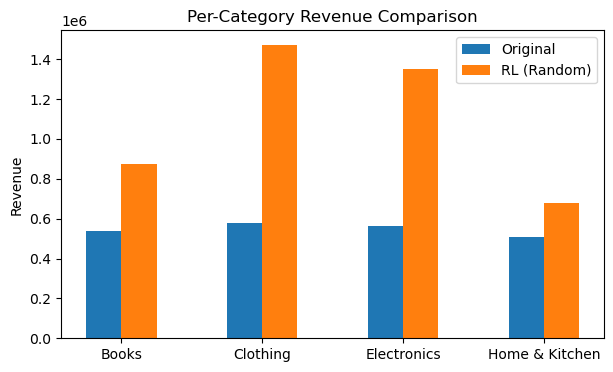

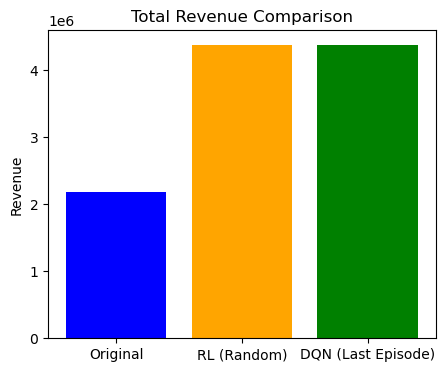

In [46]:
import matplotlib.pyplot as plt

# ==============================
# 1. Compute revenues
# ==============================
# Original revenue
ecommerce_new["original_revenue"] = ecommerce_new["Price"] * ecommerce_new["Demand"]

# Group by category
revenue_summary = ecommerce_new.groupby("Product_Category").agg({
    "original_revenue": "sum",
    "rl_revenue": "sum"
}).reset_index()

# Add DQN total revenue (from last episode)
dqn_total_revenue = ecommerce_new["rl_revenue"].sum()
original_total_revenue = ecommerce_new["original_revenue"].sum()

print("Original Total Revenue:", original_total_revenue)
print("RL (Random) Total Revenue:", revenue_summary["rl_revenue"].sum())
print("DQN (Last Episode) Total Revenue:", dqn_total_revenue)


# ==============================
# 2. Plot Per-Category Revenue
# ==============================
plt.figure(figsize=(7,4))
bar_width = 0.25
categories = revenue_summary["Product_Category"]
x = range(len(categories))

plt.bar(x, revenue_summary["original_revenue"], width=bar_width, label="Original")
plt.bar([i + bar_width for i in x], revenue_summary["rl_revenue"], width=bar_width, label="RL (Random)")
# Note: DQN is dataset-wide → we can show it separately
plt.xticks([i + bar_width/2 for i in x], categories)
plt.ylabel("Revenue")
plt.title("Per-Category Revenue Comparison")
plt.legend()
plt.show()


# ==============================
# 3. Overall Revenue Comparison
# ==============================
labels = ["Original", "RL (Random)", "DQN (Last Episode)"]
values = [original_total_revenue, revenue_summary["rl_revenue"].sum(), dqn_total_revenue]

plt.figure(figsize=(5,4))
plt.bar(labels, values, color=["blue", "orange", "green"])
plt.ylabel("Revenue")
plt.title("Total Revenue Comparison")
plt.show()
